In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("kovai.co_data.csv")

In [3]:
df.head()

,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
0,30/08/2024,16436,10705,225,19026,3925,59.0
1,15/09/2023,15499,10671,267,18421,4519,61.0
2,28/12/2021,1756,2352,0,3775,0,13.0
3,11/01/2023,10536,8347,223,14072,0,48.0
4,11/09/2021,820,612,0,1283,0,11.0


In [4]:
df.describe()

,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
count,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1898.000000
mean,9891.395203,7195.446298,179.581335,12597.213243,2352.694995,43.390411
std,6120.715714,3345.616428,156.532738,6720.494557,2494.766306,41.746882
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3044.500000,4463.500000,0.000000,6383.000000,0.000000,14.000000
50%,11417.000000,7507.000000,193.000000,13106.500000,567.500000,40.000000
75%,15517.500000,10008.250000,313.750000,17924.750000,4914.000000,68.000000
max,21070.000000,15154.000000,1029.000000,28678.000000,7255.000000,1105.000000


In [7]:
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")
df = df.sort_values('Date')
df.set_index('Date', inplace=True)

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

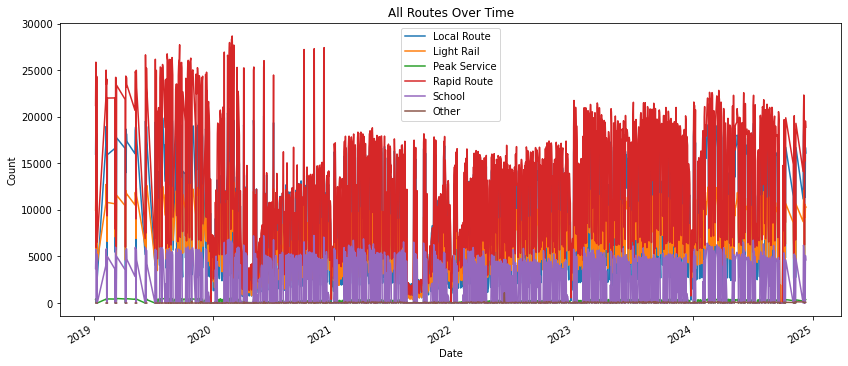

In [9]:
df.plot(figsize=(14,6))
plt.title("All Routes Over Time")
plt.xlabel("Date")
plt.ylabel("Count")
plt.show()

# Insights from Line plot
#### The plot shows highly variable daily counts across all services, with Rapid Route consistently dominating while School, Local Route, and Light Rail display strong fluctuations over time. Despite the noise, overall activity dips around 2020–2021 and gradually increases toward 2024–2025, indicating long-term recovery and growth.

# 

In [20]:
monthly_avg = df.resample('M').mean()

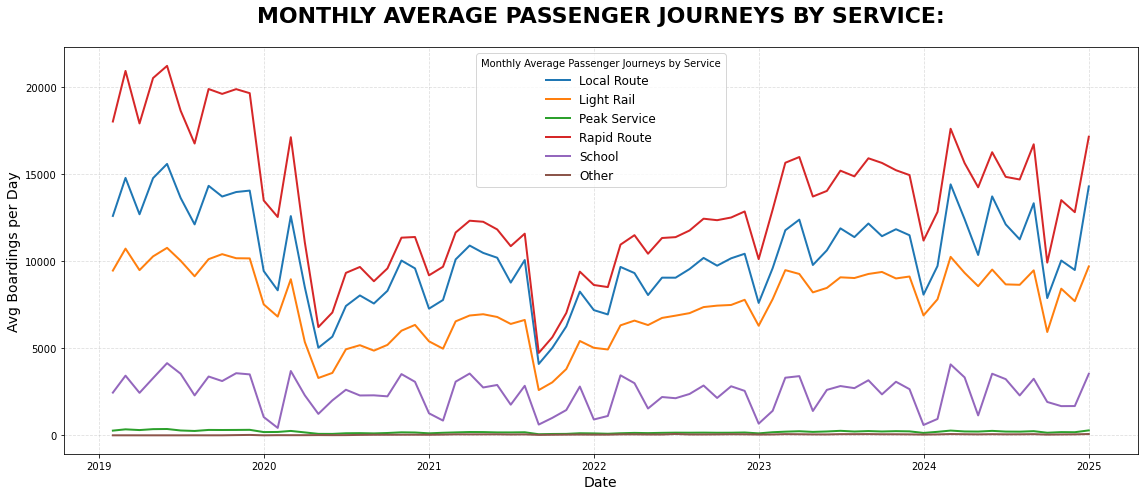

In [21]:
plt.figure(figsize=(16, 7))
for col in ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School','Other']:
    plt.plot(monthly_avg.index, monthly_avg[col], label=col, linewidth=2)

plt.title("MONTHLY AVERAGE PASSENGER JOURNEYS BY SERVICE:", 
          fontsize=22, fontweight='bold', pad=25)

plt.xlabel("Date", fontsize=14)
plt.ylabel("Avg Boardings per Day", fontsize=14)

plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(title="Monthly Average Passenger Journeys by Service", fontsize=12)

plt.tight_layout()
plt.show()

# ANALYSIS FROM MONTHLY AVERAGE PLOT

 #### Local Route, Light Rail, Rapid Route, and School services show strong seasonality with clear drops around early 2020 and early 2022, likely due to external disruptions, followed by consistent recovery and upward trends into 2024–2025. Rapid Route remains the highest-volume service throughout the period, while Peak Service and Other categories stay relatively low and stable

# 

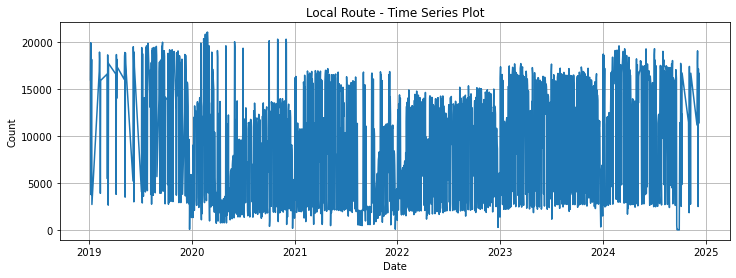

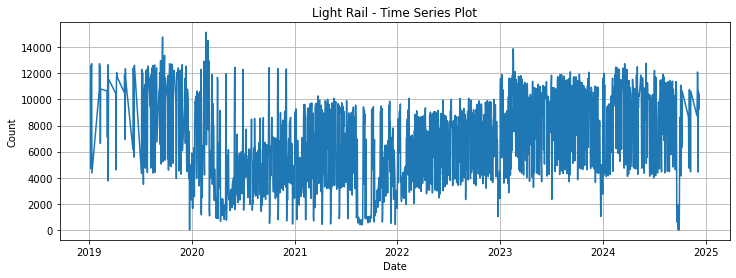

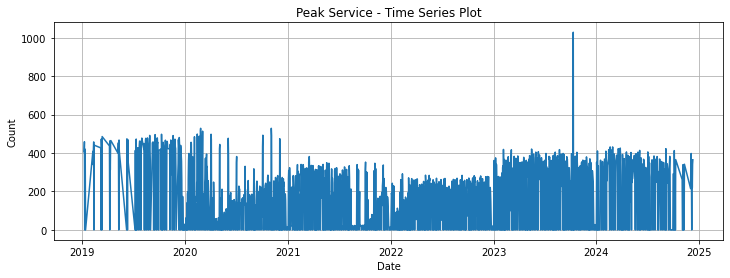

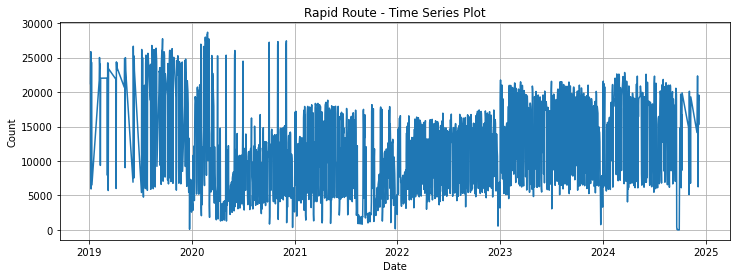

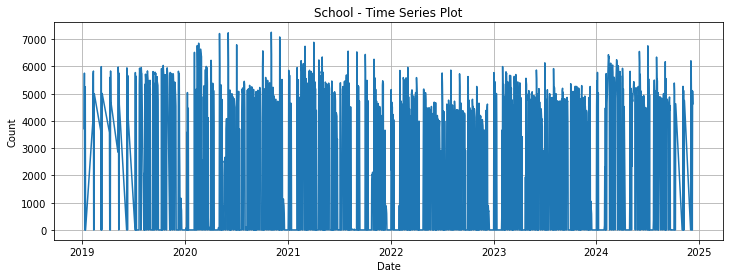

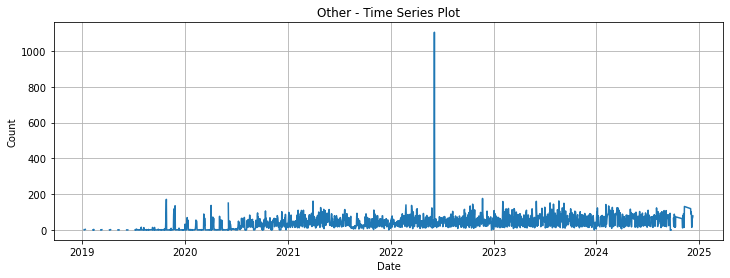

In [10]:
for col in df.columns:
    plt.figure(figsize=(12,4))
    plt.plot(df.index, df[col])
    plt.title(f"{col} - Time Series Plot")
    plt.xlabel("Date")
    plt.ylabel("Count")
    plt.grid(True)
    plt.show()

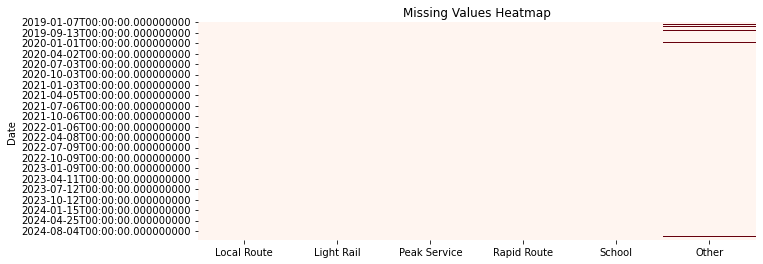

In [11]:
plt.figure(figsize=(10,4))
sns.heatmap(df.isnull(), cbar=False, cmap='Reds')
plt.title("Missing Values Heatmap")
plt.show()

In [12]:
df.isnull().sum()

Local Route      0
Light Rail       0
Peak Service     0
Rapid Route      0
School           0
Other           20
dtype: int64

In [13]:
df['Other'] = df['Other'].fillna(method='ffill').fillna(method='bfill')

In [14]:
df.isnull().sum()

Local Route     0
Light Rail      0
Peak Service    0
Rapid Route     0
School          0
Other           0
dtype: int64

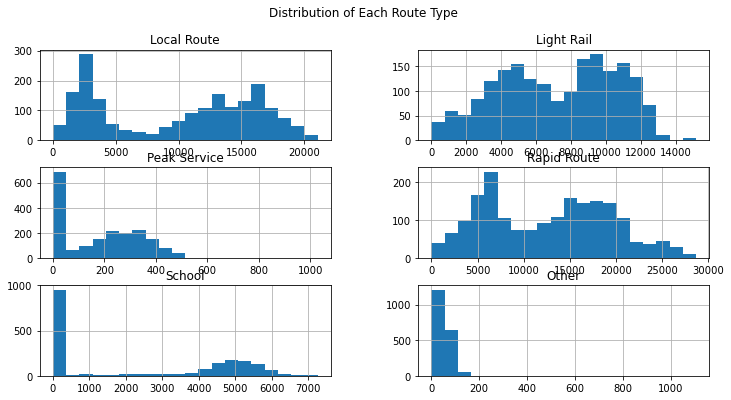

In [16]:
df.hist(figsize=(12,6), bins=20)
plt.suptitle("Distribution of Each Route Type")
plt.show()


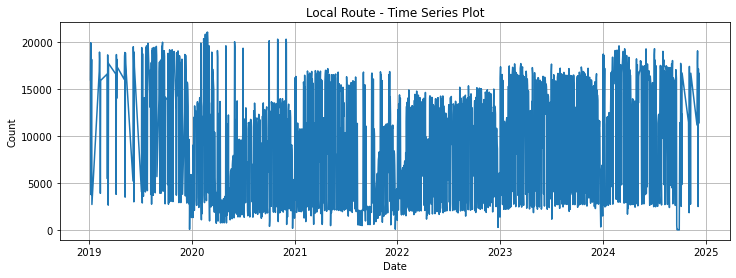

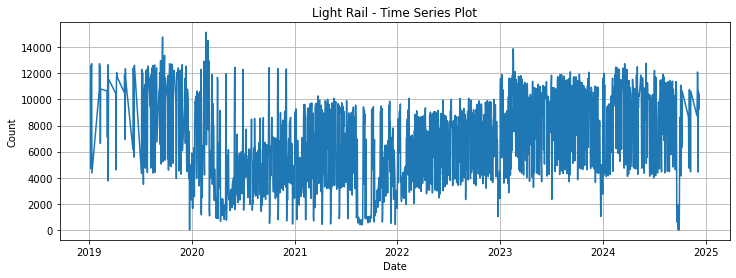

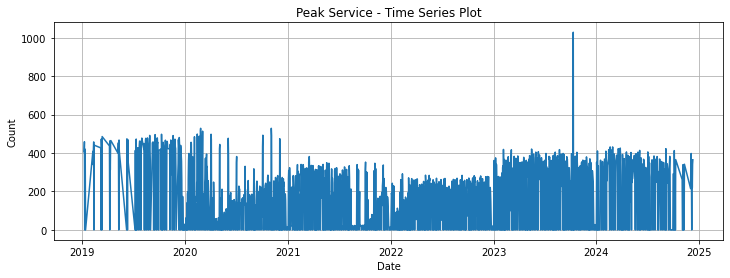

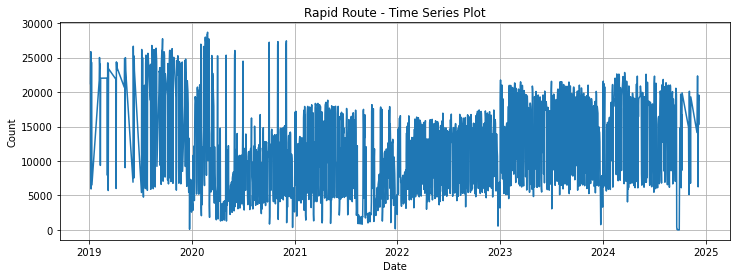

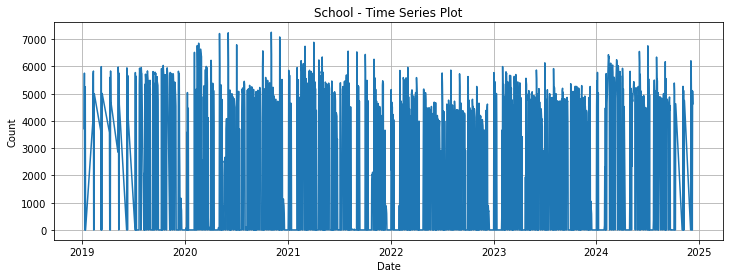

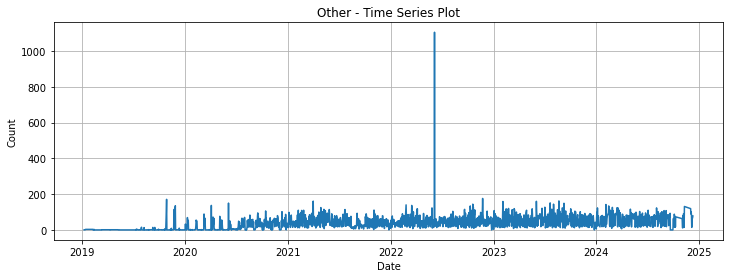

In [15]:
for col in df.columns:
    plt.figure(figsize=(12,4))
    plt.plot(df.index, df[col])
    plt.title(f"{col} - Time Series Plot")
    plt.xlabel("Date")
    plt.ylabel("Count")
    plt.grid(True)
    plt.show()

# SEASONAL DECOMPOSITION PLOT
#### The seasonal decomposition shows that Local Route has strong seasonality, high volatility, and an increasing long-term trend. The residuals show many unpredictable spikes, meaning the system is sensitive to external events.
#### In contrast, Light Rail has a smoother trend, more stable seasonal patterns, and lower residual noise, indicating more predictable ridership behavior

# 

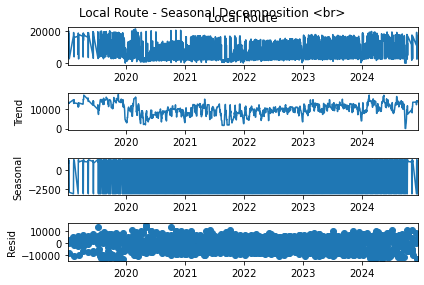

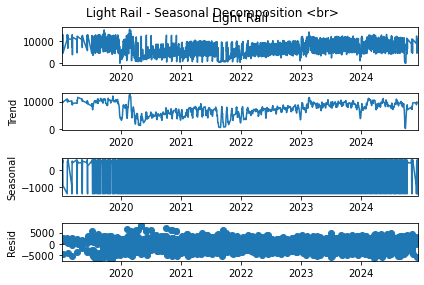

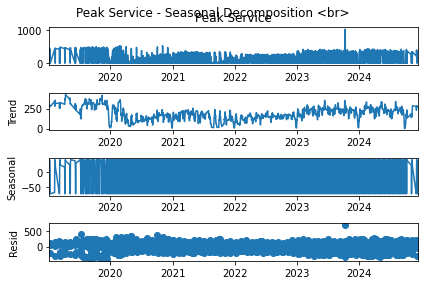

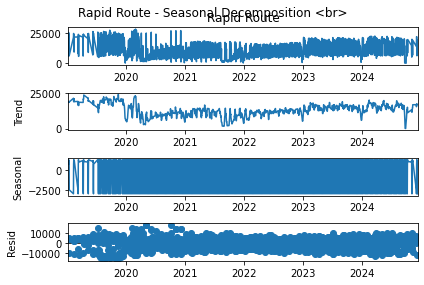

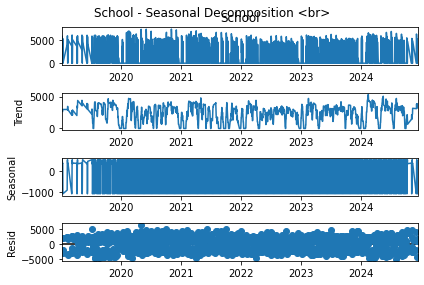

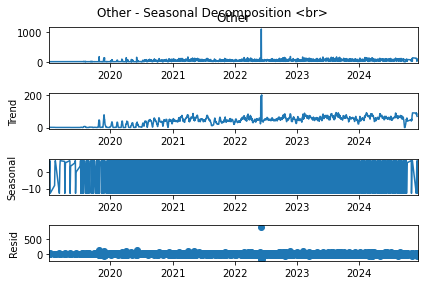

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
for col in df.columns:
    result = seasonal_decompose(df[col], model='additive', period=7)
    result.plot()
    plt.suptitle(f"{col} - Seasonal Decomposition")
    plt.show()

<Figure size 864x288 with 0 Axes>

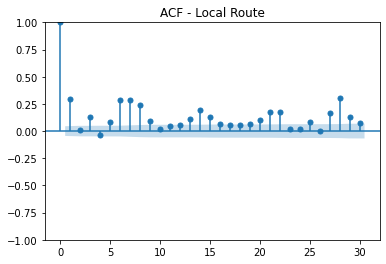

C:\Users\shang\S\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 864x288 with 0 Axes>

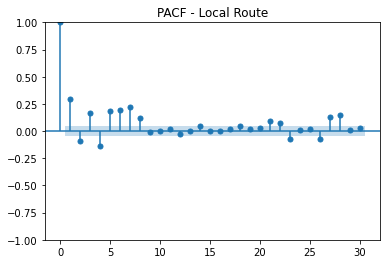

<Figure size 864x288 with 0 Axes>

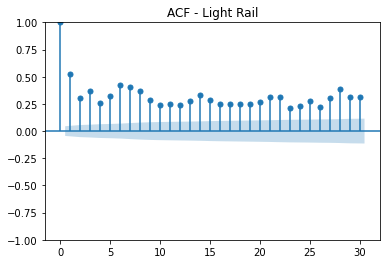

C:\Users\shang\S\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 864x288 with 0 Axes>

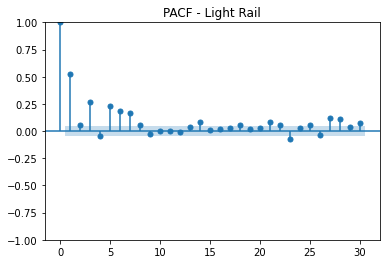

<Figure size 864x288 with 0 Axes>

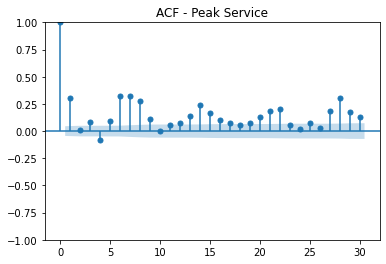

C:\Users\shang\S\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 864x288 with 0 Axes>

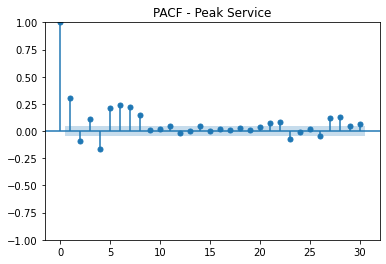

<Figure size 864x288 with 0 Axes>

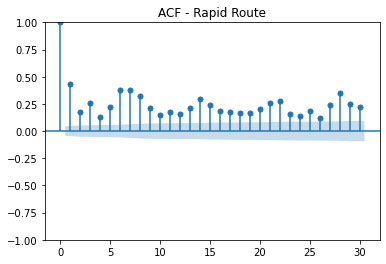

C:\Users\shang\S\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 864x288 with 0 Axes>

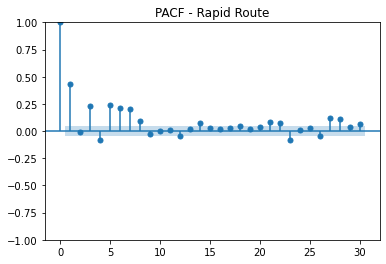

<Figure size 864x288 with 0 Axes>

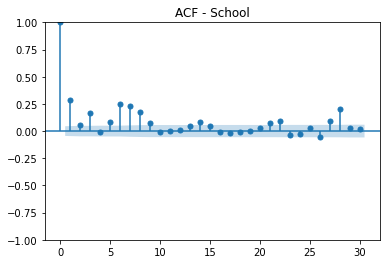

C:\Users\shang\S\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 864x288 with 0 Axes>

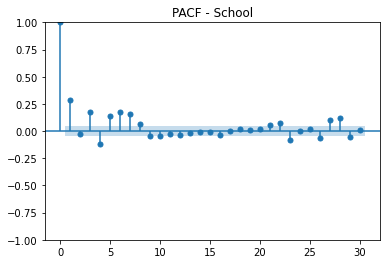

<Figure size 864x288 with 0 Axes>

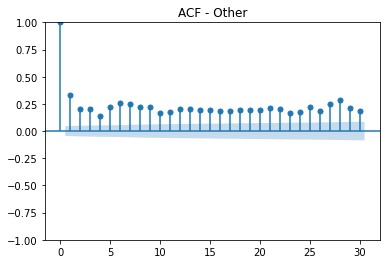

C:\Users\shang\S\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 864x288 with 0 Axes>

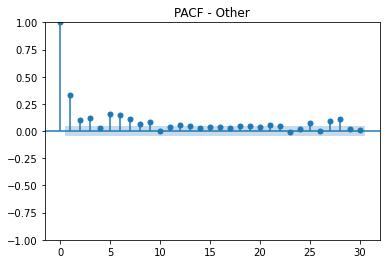

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

for col in df.columns:
    plt.figure(figsize=(12,4))
    plot_acf(df[col].dropna(), lags=30)
    plt.title(f"ACF - {col}")
    plt.show()

    plt.figure(figsize=(12,4))
    plot_pacf(df[col].dropna(), lags=30)
    plt.title(f"PACF - {col}")
    plt.show()

# ACF AND PACF PLOT OVERVIEW
#### Light Rail - The PACF shows a very strong spike at lag 1, indicating that Light Rail follows a clear AR(1) pattern with strong immediate past dependency.
#### Peak Service - The ACF displays a slowly decaying pattern across many lags, suggesting the series has a persistent autocorrelation structure typical of an AR-type process rather than an MA process.
#### The PACF shows a dominant spike at lag 1, confirming that Peak Service strongly depends on its previous day’s value.
#### Rapid Route - The ACF reveals strong autocorrelation at the first few lags, indicating that recent past values heavily influence the current demand for Rapid Routes.

